# Transfer learning (Inception V3)

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

# provided on tensorflow official website
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
#libraries required
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [8]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/train'
valid_path = 'Dataset/test'

In [9]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# we will make our own output and input layer

In [10]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [12]:
folders = glob('Dataset/train/*')
folders

['Dataset/train\\Tomato___Bacterial_spot',
 'Dataset/train\\Tomato___Early_blight',
 'Dataset/train\\Tomato___healthy',
 'Dataset/train\\Tomato___Late_blight',
 'Dataset/train\\Tomato___Leaf_Mold',
 'Dataset/train\\Tomato___Septoria_leaf_spot',
 'Dataset/train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'Dataset/train\\Tomato___Target_Spot',
 'Dataset/train\\Tomato___Tomato_mosaic_virus',
 'Dataset/train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [13]:
# layers made by myself(output)
x = Flatten()(inception.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=inception.input, outputs = prediction)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [23]:
test_set = test_datagen.flow_from_directory('Dataset/valid/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [28]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set)/10, # just beacause it was taking alot of time
  validation_steps=len(test_set)
)

Epoch 1/10
57/57 [==============================] - 417s 7s/step - loss: 1.9378 - accuracy: 0.8227 - val_loss: 1.8548 - val_accuracy: 0.8220
Epoch 2/10
57/57 [==============================] - 407s 7s/step - loss: 1.9819 - accuracy: 0.8238 - val_loss: 2.2186 - val_accuracy: 0.8103
Epoch 3/10
57/57 [==============================] - 417s 7s/step - loss: 1.8938 - accuracy: 0.8254 - val_loss: 1.9937 - val_accuracy: 0.8242
Epoch 4/10
57/57 [==============================] - 410s 7s/step - loss: 1.7962 - accuracy: 0.8367 - val_loss: 2.1129 - val_accuracy: 0.8179
Epoch 5/10
57/57 [==============================] - 445s 8s/step - loss: 1.8922 - accuracy: 0.8394 - val_loss: 3.0007 - val_accuracy: 0.7780
Epoch 6/10
57/57 [==============================] - 447s 8s/step - loss: 2.0632 - accuracy: 0.8308 - val_loss: 2.9022 - val_accuracy: 0.7965
Epoch 7/10
57/57 [==============================] - 411s 7s/step - loss: 1.9443 - accuracy: 0.8427 - val_loss: 2.5204 - val_accuracy: 0.8116
Epoch 8/10
57

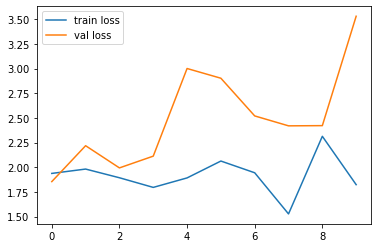

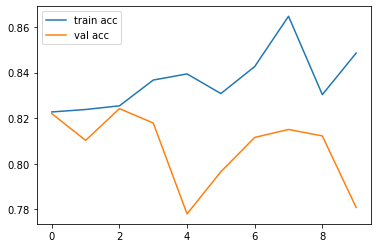

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
from tensorflow.keras.models import load_model
model.save('model_inception.h5')